**1. Загрузите файл HR.csv в pandas dataframe**





In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
sf_job = pd.read_csv('HR.csv')
sf_job.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
sf_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Посмотрим информацию о датасете. У нас 14999 стро и 10 столбцов

In [6]:
sf_job.isna().mean()*100 # проверим на пропуски. Пропусков нет.

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

**2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)**


In [7]:
#Посчитаем основные статистики для столбцов  с количественными показателями
sf_job[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


Видим, что
в среднем удовлетворенность работы 60 %, минимально коло 10% и максимально 100%. \
в среднем время с момента последней оценки 0,7 года (8,4 месяцев)\
минимально 0,36 года(4,3 месяца), максимально 1 год\
в среднем количество проектов 3,8\
минимально 2, макисмально 7 \
максимально среднее количество часов на рабочем месте 310\
минимально 96\
средний стаж работы в компании в года 3,5 года \
минимальный 2 года, максимальный 10 лет


In [9]:
sf_job[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [ ]:
# Посмотрим статистику с категориальными данными
sf_job[['Work_accident']].value_counts()

Несчастных случаев было 2169

In [ ]:
sf_job[['left']].value_counts()

Уволилось 3571 сотрудников

In [ ]:
sf_job[['promotion_last_5years']].value_counts()

Повышение получили 319 сотрудников

In [10]:
sf_job[['department']].value_counts() # Посмотрим сколько и в каких отделах работает  сотрудников

department 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [11]:
sf_job[['salary']].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

В основном сотрудники получают низкую или среднюю зарплату

**3.Рассчитать и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

In [18]:
!pip install phik

import phik
from phik.report import plot_correlation_matrix
from phik import report

Defaulting to user installation because normal site-packages is not writeable


In [13]:
sf_job_corr =sf_job[['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
sf_job_corr

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,2,157,3,0,1,0
1,0.80,5,262,6,0,1,0
2,0.11,7,272,4,0,1,0
3,0.72,5,223,5,0,1,0
4,0.37,2,159,3,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,1,0
14995,0.37,2,160,3,0,1,0
14996,0.37,2,143,3,0,1,0
14997,0.11,6,280,4,0,1,0


In [20]:
phik_overview = sf_job_corr.phik_matrix()
phik_overview

interval columns not set, guessing: ['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.671192,0.632964,0.434504,0.126103,0.794751,0.048870
number_project,0.671192,1.000000,0.520013,0.418083,0.127437,0.793722,0.042565
average_montly_hours,0.632964,0.520013,1.000000,0.327967,0.089761,0.572472,0.017737
time_spend_company,0.434504,0.418083,0.327967,1.000000,0.089437,0.497255,0.192891
Work_accident,0.126103,0.127437,0.089761,0.089437,1.000000,0.239838,0.059210
left,0.794751,0.793722,0.572472,0.497255,0.239838,1.000000,0.095205
promotion_last_5years,0.048870,0.042565,0.017737,0.192891,0.059210,0.095205,1.000000


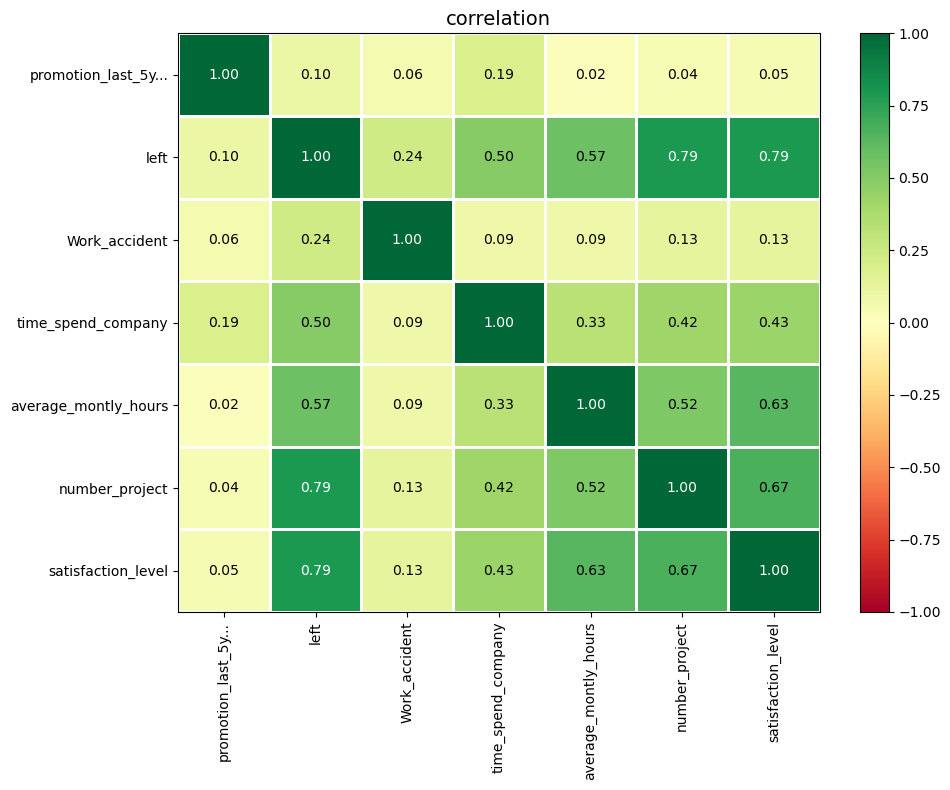

In [16]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

самые скорелированные:\
number_project и left\
satisfaction_level и left

наименее скоррелированные:\
average_montly_hours и promotion_last_5years\
promotion_last_5years и number_project


**4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**


In [21]:
sf_job[['department']].value_counts()

department 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Наибольшее количество сотрудников работает в продажах\
Далее идут технические специалисты , поддержка, IT специалисты и т.д. \
и наименьшее число(что логично) управляющие

**5.Показать распределение сотрудников по зарплатам**

In [22]:
sf_job[['salary']].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [23]:
low= 7316/14999*100
medium  = 6446/14999*100
high = 1237/14999*100

In [24]:
print(low)
print(medium)
print(high)

48.77658510567372
42.97619841322755
8.24721648109874


49% сотрудников получают низкую  заработую плату\
43% сотрудников получают среднюю  заработую плату\
8% сотрудников получают высокую  заработую плату


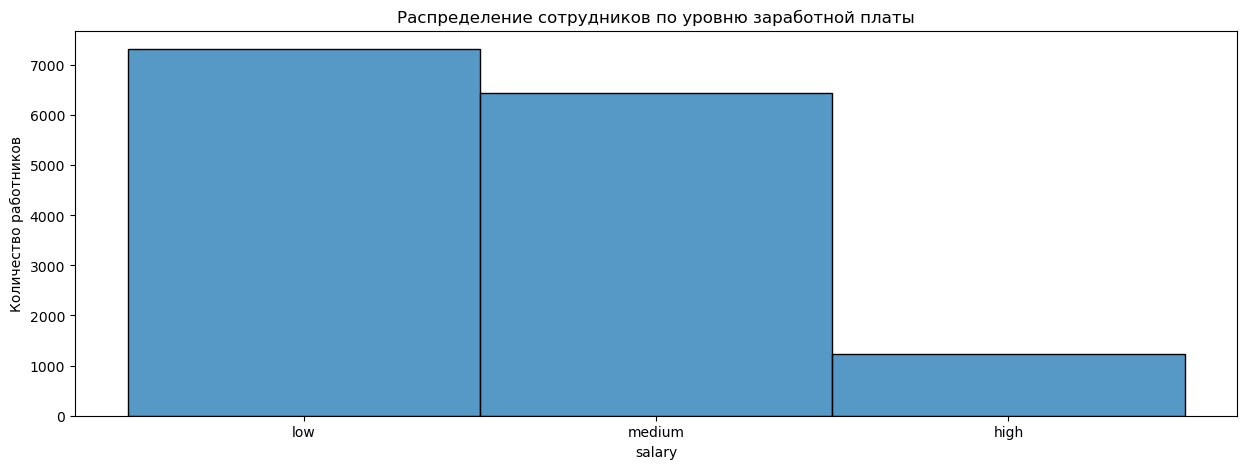

In [25]:
plt.figure(figsize=[15, 5])
sns.histplot(data=sf_job, x='salary', bins=40)
plt.title("Распределение сотрудников по уровню заработной платы")
plt.ylabel("Количество работников")
plt.show()

 **6.Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.**

In [26]:
sf_job_sal = sf_job.groupby([sf_job['department'],sf_job['salary']])[['salary']].count()
sf_job_sal

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: ylabel='department,salary'>

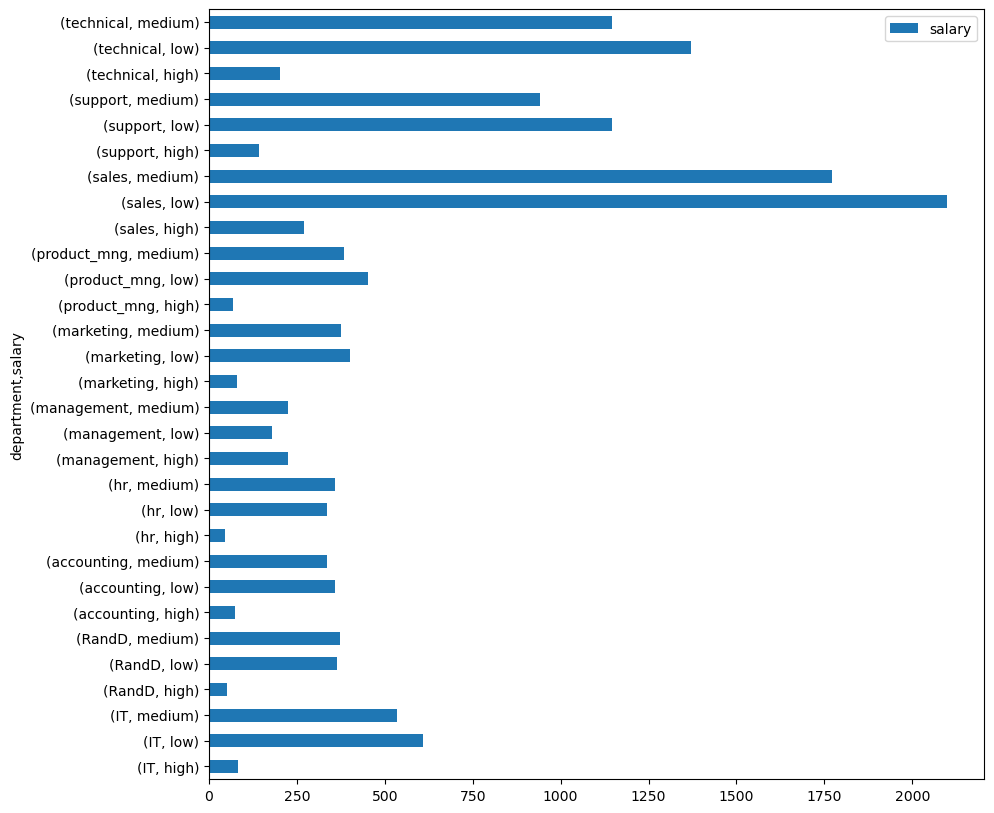

In [27]:
sf_job_sal.plot(kind="barh",figsize=(10,10))

Почти во всех отделах превалирует низкая заработная плата.\
Кроме RandD, HR, management

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**







In [28]:
hight_sal = sf_job.loc[sf_job['salary'] == 'high']['average_montly_hours'].values
low_sal = sf_job.loc[sf_job['salary'] == 'low']['average_montly_hours'].values


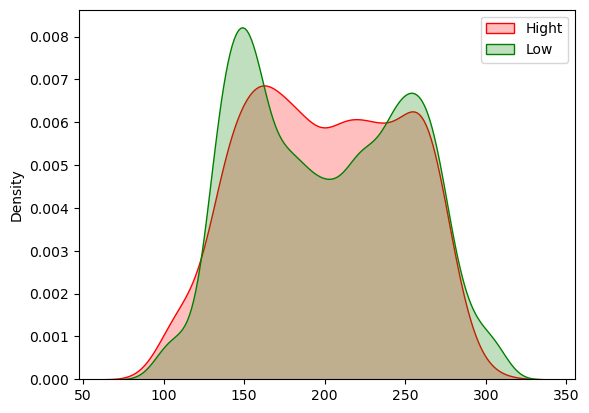

In [29]:
sns.kdeplot(hight_sal, label="Hight", fill = True, color = 'red')
sns.kdeplot(low_sal, label="Low", fill = True, color = 'green')
plt.legend()
plt.show()

In [30]:
stat, p = st.shapiro(hight_sal)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.971, p = 0.00000
Вероятно не нормальное распределение


In [31]:
stat, p = st.shapiro(low_sal)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.960, p = 0.00000
Вероятно не нормальное распределение


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распределения  оба не нормальные, но очень похожи


In [32]:
stat, p = st.ttest_ind(hight_sal, low_sal)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу')

Статистика = -0.72887, p = 0.46610
Не отклоняем нулевую гипотезу


Уровень заработной платы не вылияет на рабочее время

 **8.Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):\
● Доля сотрудников с повышением за последние 5 лет\
● Средняя степень удовлетворенности\
● Среднее количество проектов**


In [33]:
sf_job_left = sf_job.loc[sf_job['left'] == 1] # датасет по уволившимся сотрудникам
sf_job_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
len(sf_job_left.loc[sf_job_left['promotion_last_5years'] == 1])/len(sf_job_left) # Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников

0.005320638476617194

In [35]:
sf_job_left['satisfaction_level'].mean()# средняя степень удовлетворенности среди уволившихся сотрудников

0.4400980117614114

In [36]:
sf_job_left['number_project'].mean() # Среднее количество проектов среди уволившихся сотрудников

3.8555026603192384

In [37]:
sf_job_not_left = sf_job.loc[sf_job['left'] == 0] # датасет по не уволившимся сотрудникам
sf_job_not_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [38]:
len(sf_job_not_left.loc[sf_job_not_left['promotion_last_5years'] == 1])/len(sf_job_not_left) # Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников

0.026251312565628283

In [39]:
sf_job_not_left['satisfaction_level'].mean()# средняя степень удовлетворенности среди не уволившихся сотрудников

0.666809590479524

In [40]:
sf_job_not_left['number_project'].mean() # Среднее количество проектов среди не уволившихся сотрудников

3.786664333216661

**9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)\
Оценить качество модели на тестовой выборке**

In [48]:
left = pd.array(sf_job['left'])

In [120]:
from sklearn.model_selection import train_test_split #  разделим на тренировочеую и тестовую
X_train, X_test, y_train, y_test = train_test_split(sf_job[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #  импортируем lda
lda = LinearDiscriminantAnalysis()

In [122]:
lda.fit(X_train, y_train)# обучаем данные

LinearDiscriminantAnalysis()

In [123]:
lda.predict(X_test) #  прогноз на тестовой выборке

array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
2995,0.0,0.0
2996,0.0,0.0
2997,0.0,0.0
2998,0.0,0.0


In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.765

 Модель работает неплохо, т.к. показатель 0,76 ближе к 1  